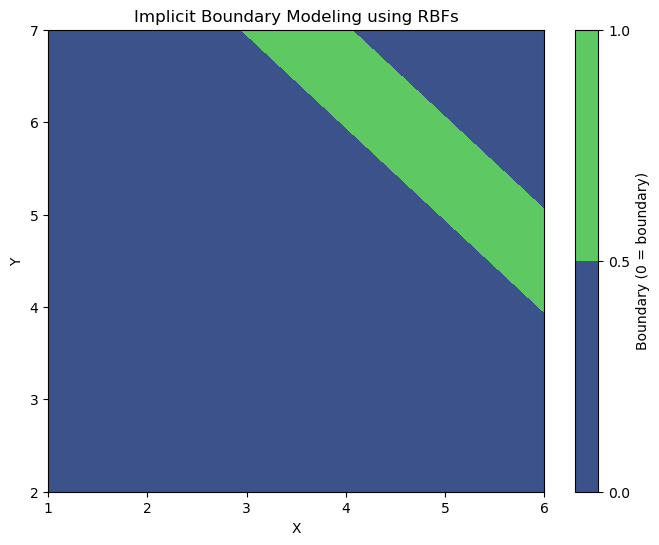

In [1]:
import numpy as np
from scipy.interpolate import Rbf
import matplotlib.pyplot as plt

data = np.array([
    [1, 2, 3, -1],
    [2, 3, 4, -1],
    [3, 4, 5, -1],
    [4, 5, 6, 1],
    [5, 6, 7, 1],
    [6, 7, 8, 1]
])


coords = data[:, :3]  # (x, y, z)
signed_distances = data[:, 3]  # Signed distances


rbf = Rbf(coords[:, 0], coords[:, 1], coords[:, 2], signed_distances, function='thin_plate')


x_grid, y_grid, z_grid = np.meshgrid(
    np.linspace(1, 6, 10),
    np.linspace(2, 7, 10),
    np.linspace(3, 8, 10),
    indexing='ij'
)


interpolated_distances = rbf(x_grid, y_grid, z_grid)


boundary = np.abs(interpolated_distances) < 0.1


plt.figure(figsize=(8, 6))
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], boundary[:, :, 0], cmap='viridis')
plt.colorbar(label="Boundary (0 = boundary)")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Implicit Boundary Modeling using RBFs")
plt.show()

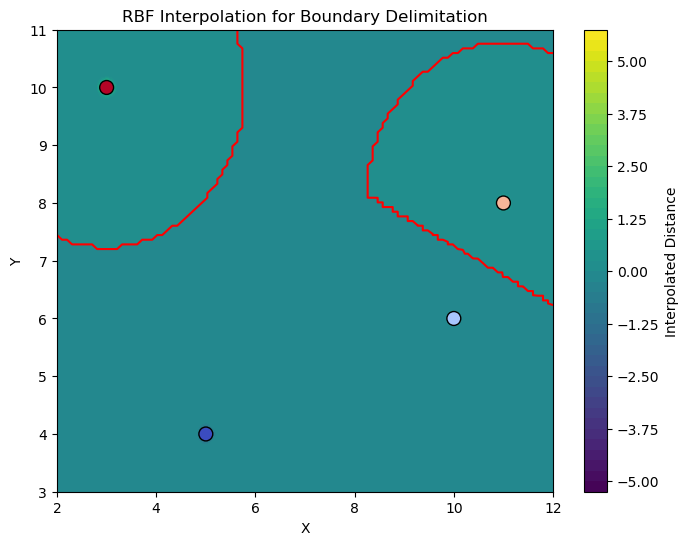

In [1]:
import numpy as np
from scipy.interpolate import Rbf
import matplotlib.pyplot as plt

# Sample data (x, y, signed distance)
data = np.array([
    [5, 4, -6.3],  # Domain 1
    [10, 6, -2.2],  # Domain 1
    [3, 10, 6.3],  # Domain 2
    [11, 8, 2.2]   # Domain 2
])

# Extract coordinates and signed distances
x = data[:, 0]
y = data[:, 1]
f = data[:, 2]

# Create RBF interpolator (Gaussian RBF with epsilon=0.1)
rbf = Rbf(x, y, f, function='gaussian', epsilon=0.1)

# Define a grid for interpolation
x_grid, y_grid = np.meshgrid(
    np.linspace(2, 12, 100),
    np.linspace(3, 11, 100),
    indexing='ij'
)

# Interpolate signed distances on the grid
f_interp = rbf(x_grid, y_grid)

# Plot the results
plt.figure(figsize=(8, 6))
plt.contourf(x_grid, y_grid, f_interp, levels=50, cmap='viridis')
plt.colorbar(label="Interpolated Distance")
plt.scatter(x, y, c=f, cmap='coolwarm', edgecolor='k', s=100)
plt.contour(x_grid, y_grid, f_interp, levels=[0], colors='red')  # Boundary line
plt.xlabel("X")
plt.ylabel("Y")
plt.title("RBF Interpolation for Boundary Delimitation")
plt.show()